# Kết nối với drive

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!pip install --upgrade gensim



# Import Thư Viện

In [18]:
import os
from gensim.models import KeyedVectors
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dẫn tới model up drive

In [19]:

word2vec_path = '/content/drive/MyDrive/NLP_W5/word2vec_skipgram.model'
fasttext_path = '/content/drive/MyDrive/NLP_W5/fasttext_gensim.model'

In [20]:
print("Loading Word2Vec model...")
word2vec_model = KeyedVectors.load(word2vec_path)
print(" Word2Vec loaded.")

print("Loading FastText model...")
fasttext_model = KeyedVectors.load(fasttext_path)
print("FastText loaded.")

Loading Word2Vec model...
 Word2Vec loaded.
Loading FastText model...
FastText loaded.


# Thử 1 số từ gần nghĩa

In [21]:
words_to_test = ['công_nghệ', 'tình_yêu', 'giáo_dục', 'báo_chí', 'con_người']

print("➡ Word2Vec:")
for w in words_to_test:
    if w in word2vec_model:
        print(f"\nTop 5 từ gần nghĩa với '{w}':")
        for word, score in word2vec_model.most_similar(w, topn=5):
            print(word, round(score, 4))

print("\n➡ FastText:")
for w in words_to_test:
    if w in fasttext_model:
        print(f"\nTop 5 từ gần nghĩa với '{w}':")
        for word, score in fasttext_model.most_similar(w, topn=5):
            print(word, round(score, 4))

➡ Word2Vec:

Top 5 từ gần nghĩa với 'công_nghệ':
nanô 0.6653
cuda 0.6547
công_nghệ_vật_liệu 0.6537
nguyên_mẫu_số 0.6522
vbeb 0.644

Top 5 từ gần nghĩa với 'tình_yêu':
yêu_đời 0.6968
tình 0.6906
hạnh_phúc 0.6851
tình_cảm 0.6806
lãng_mạn 0.6729

Top 5 từ gần nghĩa với 'giáo_dục':
gd 0.7762
đạo_đức_học_sinh 0.737
cbql 0.7347
gdđh 0.7235
seqap 0.7234

Top 5 từ gần nghĩa với 'báo_chí':
truyền_thông 0.6828
quy_chế_phát_ngôn 0.6598
kỹ_năng_phát_ngôn 0.657
công_tác_phát_ngôn 0.6534
fcct 0.647

Top 5 từ gần nghĩa với 'con_người':
loài_người 0.6822
trực_giác 0.643
thế_giới_quan 0.6311
neanderthal 0.6202
tâm_tính 0.6114

➡ FastText:

Top 5 từ gần nghĩa với 'công_nghệ':
công_nghệ_gps 0.9267
công_nghệ_hd 0.9247
công_nghệ_p1 0.9229
công_nghệ_p2 0.9218
công_nghệ_ibm 0.9216

Top 5 từ gần nghĩa với 'tình_yêu':
tình_yêu_đời 0.9052
tâm_tình_yêu 0.891
đa_tình_yêu 0.8852
tình_yêu_dấu 0.8779
thần_tình_yêu 0.871

Top 5 từ gần nghĩa với 'giáo_dục':
khoa_giáo_dục 0.8801
quốc_giáo_dục 0.8655
giáo_khoa_giáo_dục 

# Visualize Word2Vec embedding với PCA

In [28]:
words_to_visualize = ['công_nghệ', 'tình_yêu', 'giáo_dục', 'trường_học', 'đàn_ông', 'phụ_nữ' ,'con_người','vật_lý' , 'sách_vở' , 'rèn_luyện','hoa_cúc' ,'cây_xanh','búp_măng']

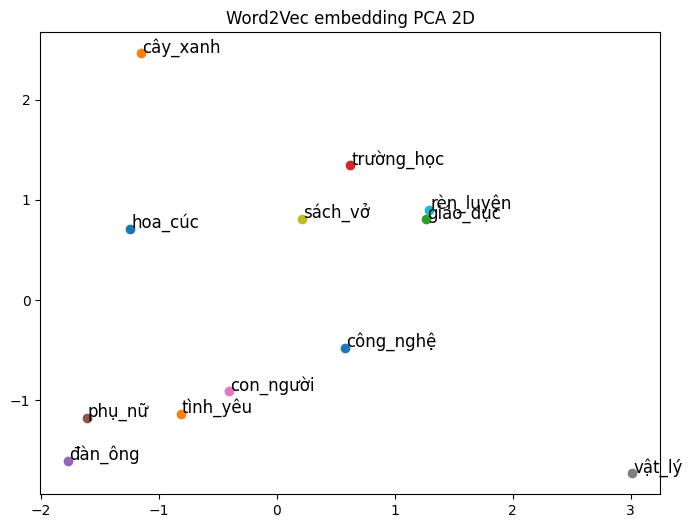

In [29]:

vectors = []
labels = []

for w in words_to_visualize:
    if w in word2vec_model:
        vectors.append(word2vec_model[w])
        labels.append(w)

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, label in enumerate(labels):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, label, fontsize=12)
plt.title("Word2Vec embedding PCA 2D")
plt.show()

#  Visualize FastText embedding với PCA

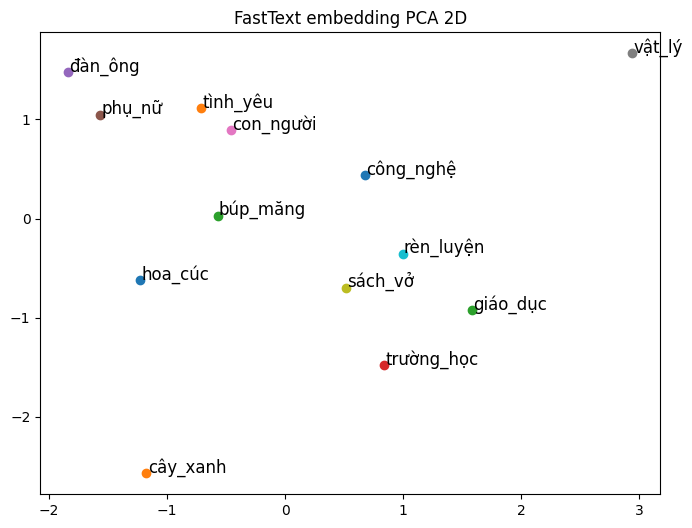

In [30]:
vectors = []
labels = []

for w in words_to_visualize:
    if w in fasttext_model:
        vectors.append(fasttext_model[w])
        labels.append(w)

pca = PCA(n_components=2)
vectors_2d = pca.fit_transform(vectors)

plt.figure(figsize=(8,6))
for i, label in enumerate(labels):
    x, y = vectors_2d[i]
    plt.scatter(x, y)
    plt.text(x+0.01, y+0.01, label, fontsize=12)
plt.title("FastText embedding PCA 2D")
plt.show()